# Exemple compléxité min-max

In [16]:
from random import randrange
from timeit import repeat, timeit
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from IPython.display import display

sns.set_theme(style="whitegrid")
FACTOR = 1.1
sns.set(rc={"figure.figsize": (FACTOR * 11.7, FACTOR * 8.27)})


def make_array(length=100, max_range=1000):
    """returns an array of integers in [0, `max_range`[ of length `length`"""
    return [randrange(max_range) for _ in range(length)]


NB_EXECS = 1
MAX_EXPONENT = 6
MIN_EXPONENT = 1
NB_REPEAT = 5
BASE = 10


In [17]:
def min_max_etudiant(arr):
    the_min = arr[0]
    the_max = arr[0]
    for v in arr:
        if v < the_min:
            the_min = v
        if v > the_max:
            the_max = v

    return the_min, the_max


def min_max_sorter(arr):
    s = sorted(arr)
    return s[0], s[-1]


def min_max_pythonista(arr):
    return min(arr), max(arr)


In [18]:
functs = (min_max_etudiant, min_max_sorter, min_max_pythonista)


def do_exp_min_max(lengths, /, nb_repeats = NB_REPEAT, nb_execs=NB_EXECS):
    results = {}
    for length in lengths:
        result = {}
        for funct in functs:
            # print(f"Repeat {NB_REPEAT} times {NB_EXECS} executions on length {length} for {funct.__name__}")
            test_array = make_array(length, 2 * length)
            times = repeat(lambda: funct(test_array), repeat=nb_repeats, number=nb_execs)
            result[funct.__name__] = [1000 * time / nb_execs for time in times]
        results[length] = result
    return [
        {"size": size, "function": f, "time": t} for size, res in results.items() for f, ts in res.items() for t in ts
    ]


In [19]:
results_small = do_exp_min_max(range(10, 201, 10), nb_repeats=10)
data_small = pd.DataFrame.from_records(
    results_small,
).sort_values(["size", "function"])


<Figure size 926.64x654.984 with 1 Axes>

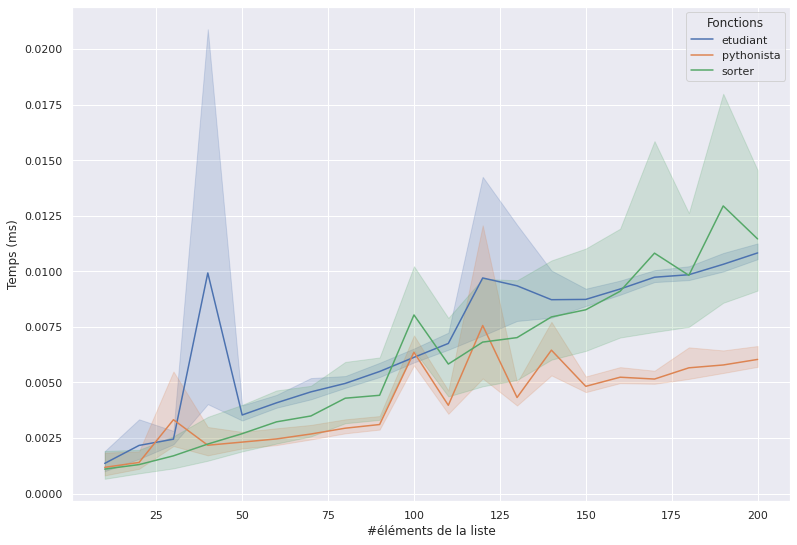

In [20]:
def show(df, filename=None):
    ax = sns.lineplot(data=df, x="size", y="time", hue="function")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles=handles,
        labels=[l.replace("min_max_", "") for l in labels],
        title="Fonctions",
    )
    # plt.title("$y = f(x)$ pour deux fonctions")
    plt.ylabel("Temps (ms)")
    plt.xlabel("#éléments de la liste")
    if filename:
        plt.savefig(filename)
    plt.show()


show(data_small, "min_max_small.png")


<Figure size 926.64x654.984 with 1 Axes>

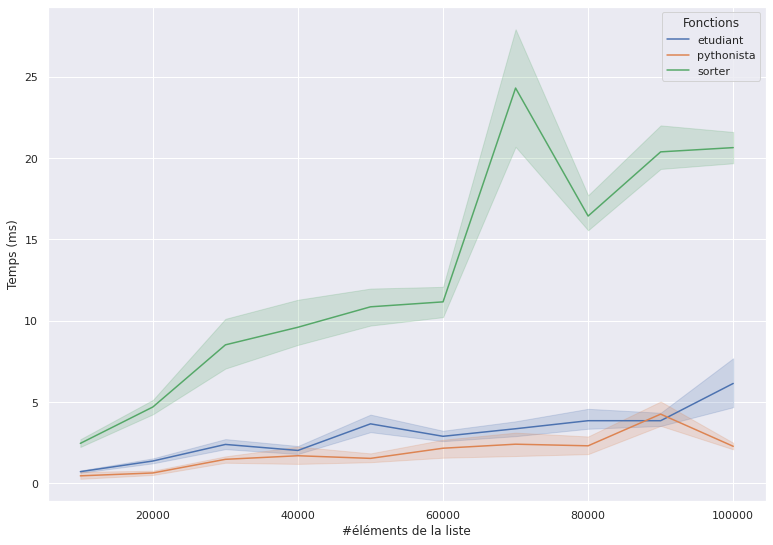

In [21]:
lengths = list(range(10_000, 100_001, 10_000))
results_large = do_exp_min_max(lengths)

data_large = pd.DataFrame.from_records(
    results_large,
).sort_values(["size", "function"])

show(data_large, "min_max_large.png")


<Figure size 926.64x654.984 with 1 Axes>

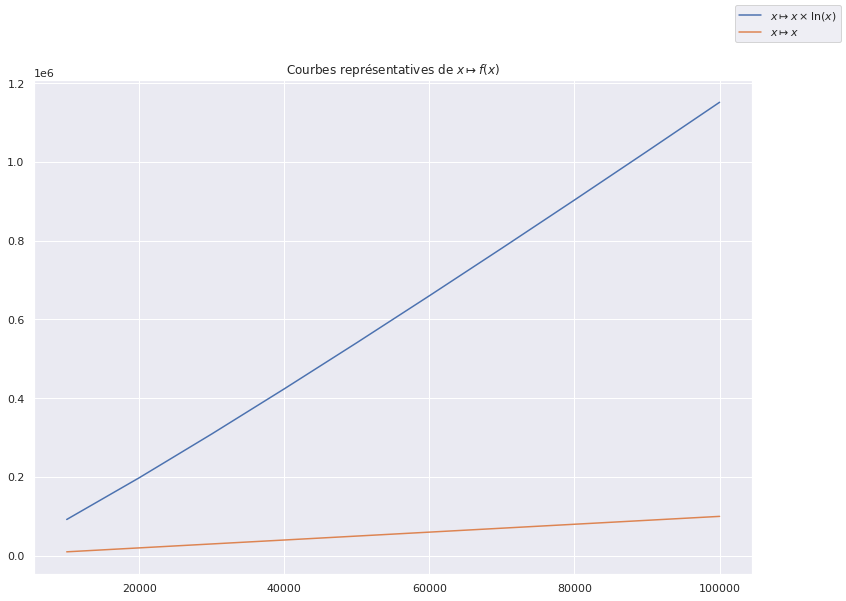

In [22]:
xs = lengths

fig = plt.figure()
sns.lineplot(x=xs, y= np.log(xs)*xs)
sns.lineplot(x=xs, y= xs)
fig.legend(labels=["$x \mapsto x \\times \\ln(x)$", "$x \mapsto x$"])
plt.title("Courbes représentatives de $x \mapsto f(x)$")
plt.show()